In [2]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
#Create a data frame
wine_df = pd.DataFrame(df)
wine_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
wine_df = wine_df.sort_values(by='price', ascending=False)
wine_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
338,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2010,4.6,28,Espana,Bierzo,3119.08,Red,4.0,3.0
196,Vega Sicilia,Unico,1965,4.6,218,Espana,Ribera del Duero,2884.04,Ribera Del Duero Red,5.0,3.0
115,Bodega Numanthia,Termanthia,2004,4.7,108,Espana,Toro,2814.16,Toro Red,5.0,3.0
343,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2011,4.6,27,Espana,Priorato,2750.00,Priorat Red,4.0,3.0
280,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2010,4.6,60,Espana,Priorato,2750.00,Priorat Red,4.0,3.0


Text(0.5, 0, 'Rating, Points')

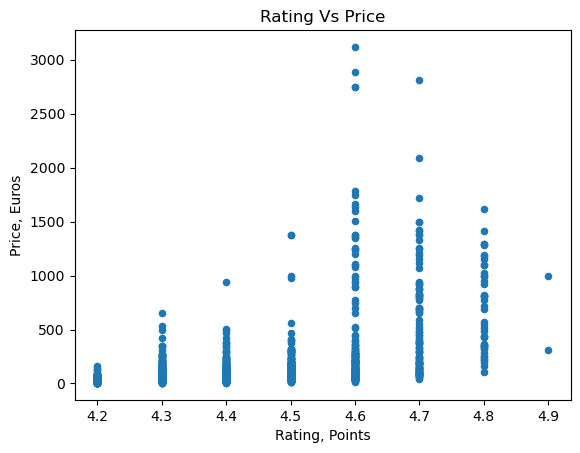

In [5]:
rating_vs_price_plot = wine_df.plot(kind='scatter', x='rating',y='price')
plt.title("Rating Vs Price")
plt.ylabel("Price, Euros")
plt.xlabel("Rating, Points")

([], [])

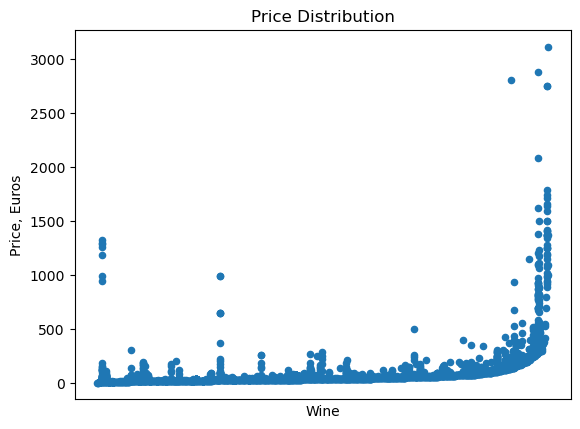

In [6]:
wine_df = wine_df.sort_values(by='price', ascending=True)
price_dist_plot = wine_df.plot(kind='scatter',x='wine',y='price')
plt.title("Price Distribution")
plt.ylabel("Price, Euros")
plt.xlabel("Wine")
plt.xticks([])

In [7]:
wine_df['winery'].value_counts()

winery
Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Marta Mate                                1
Marques de Burgos                         1
Guillem Carol - Cellers Carol Valles      1
Vins Miquel Gelabert                      1
Barbadillo                                1
Name: count, Length: 480, dtype: int64

In [8]:
wine_df['wine'].value_counts()

wine
Reserva                             467
Gran Reserva                        458
Rioja Reserva                       240
El Viejo                            224
Valdegines                          223
                                   ... 
Les Terrasses Laderas de Pizarra      1
Punta Esencia                         1
Sibila                                1
Les Eres Vinyes Velles                1
Altos de Losada El Cepon              1
Name: count, Length: 847, dtype: int64

In [9]:
wine_df['region'].value_counts()

region
Rioja                2440
Ribera del Duero     1413
Priorato              686
Toro                  300
Vino de Espana        263
                     ... 
Condado de Huelva       1
Abona                   1
Jerez Cream             1
Monterrei               1
Murcia                  1
Name: count, Length: 76, dtype: int64

In [10]:
wine_df['type'].value_counts()

type
Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Grenache                  35
Pedro Ximenez             35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: count, dtype: int64

In [11]:
wine_df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [12]:
wine_df.dropna(inplace=True)

In [13]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6329 entries, 1822 to 338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6329 non-null   object 
 1   wine         6329 non-null   object 
 2   year         6329 non-null   object 
 3   rating       6329 non-null   float64
 4   num_reviews  6329 non-null   int64  
 5   country      6329 non-null   object 
 6   region       6329 non-null   object 
 7   price        6329 non-null   float64
 8   type         6329 non-null   object 
 9   body         6329 non-null   float64
 10  acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 593.3+ KB


In [14]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.set_output(transform="pandas")
encoder.fit(wine_df[['winery', 'wine', 'region', 'type']])
encoded_columns = encoder.transform(wine_df[['winery', 'wine', 'region', 'type']])
# encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))
# print(encoded_columns)
column_names = encoder.get_feature_names_out()
print(column_names)
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

['winery_AGE' 'winery_Aalto' 'winery_Abadal' ... 'type_Tempranillo'
 'type_Toro Red' 'type_Verdejo']


In [15]:
encoded_df.head()

,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,winery_Adama Wines,winery_Adega Familiar Eladio Pineiro,winery_Agusti Torello Mata,winery_Albamar,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
1822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
wine_df_encoded = pd.concat([wine_df, encoded_df], axis=1)
wine_df_encoded.drop(['winery', 'wine', 'region', 'type', 'country'], axis=1, inplace=True)
wine_df_encoded.head()

,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
1822,N.V.,4.2,32624,4.99,4.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1764,2021,4.3,32,6.26,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1947,2020,4.2,630,6.99,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2612,N.V.,4.2,405,7.10,4.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2912,N.V.,4.2,405,7.10,4.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Convert non-numeric 'year' values to NaN
wine_df_encoded['year'] = pd.to_numeric(wine_df_encoded['year'], errors='coerce')

# Drop rows with NaN values in 'year' column
wine_df_encoded = wine_df_encoded.dropna(subset=['year'])

In [18]:
scaler = StandardScaler()
scaler.fit(wine_df_encoded)

scaled_data = scaler.transform(wine_df_encoded)
scaled_df = pd.DataFrame(scaled_data, columns=wine_df_encoded.columns)
scaled_df.head()


,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,1.125990,0.318792,-0.674463,-0.369409,-1.959409,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,-0.516169,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,15.246689
1,0.986025,-0.480492,0.313930,-0.364998,-1.959409,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,-0.516169,-0.738721,8.341546,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588
2,0.846061,1.118075,-0.656282,-0.359560,-3.643102,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,-0.516169,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588
3,0.986025,1.118075,-0.682728,-0.359500,1.407978,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,1.937351,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588
4,0.846061,0.318792,-0.684380,-0.355451,1.407978,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,1.937351,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588


In [19]:
wine_df_encoded.corr()

,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
year,1.000000,-0.299519,0.042120,-0.384351,-0.100687,0.155387,-0.096938,0.020723,0.012589,0.006799,...,-0.063803,-0.199310,0.043480,0.017776,-0.060871,-0.014287,0.017748,0.067575,0.137507,0.045252
rating,-0.299519,1.000000,-0.003144,0.551943,0.161058,-0.085140,0.004092,0.074640,0.001164,0.061987,...,0.168104,-0.156848,0.000335,0.024862,0.049320,0.032103,0.034708,0.011232,0.008503,0.061235
num_reviews,0.042120,-0.003144,1.000000,-0.045856,0.079627,0.050742,-0.008721,0.128458,-0.005859,0.059835,...,0.085506,0.021647,-0.019770,-0.014875,-0.011960,-0.018388,-0.008098,-0.035323,0.016511,-0.013291
price,-0.384351,0.551943,-0.045856,1.000000,0.150861,-0.030566,0.012611,0.002633,-0.006149,0.002651,...,0.148760,-0.101955,-0.012442,-0.007130,0.027208,0.001630,-0.007137,0.010452,0.017485,-0.013248
body,-0.100687,0.161058,0.079627,0.150861,1.000000,-0.001638,-0.003539,0.057195,-0.006131,-0.015853,...,0.726754,-0.203677,-0.234898,-0.043571,-0.005006,-0.104602,-0.012773,-0.059141,0.298446,-0.128514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_Sparkling,-0.014287,0.032103,-0.018388,0.001630,-0.104602,0.006252,-0.000369,-0.001166,-0.000638,-0.001651,...,-0.014820,-0.021210,-0.003442,-0.000638,-0.000521,1.000000,-0.001330,-0.006159,-0.006086,-0.001883
type_Syrah,0.017748,0.034708,-0.008098,-0.007137,-0.012773,0.010088,-0.000595,-0.001882,-0.001030,0.121709,...,-0.023913,-0.034223,-0.005554,-0.001030,-0.000841,-0.001330,1.000000,-0.009937,-0.009820,-0.003039
type_Tempranillo,0.067575,0.011232,-0.035323,0.010452,-0.059141,-0.836510,-0.002753,-0.008714,-0.004770,0.057762,...,-0.110719,-0.158456,-0.025715,-0.004770,-0.003894,-0.006159,-0.009937,1.000000,-0.045467,-0.014069
type_Toro Red,0.137507,0.008503,0.016511,0.017485,0.298446,0.046156,-0.002721,-0.008611,-0.004713,-0.012187,...,-0.109411,-0.156585,-0.025411,-0.004713,-0.003848,-0.006086,-0.009820,-0.045467,1.000000,-0.013903


In [20]:
y = wine_df_encoded['price']
X = wine_df_encoded.drop(columns='price')

In [21]:
from ClassificationDataPipeline import train_and_evaluate_models
df = pd.read_csv('wines_SPA.csv')
target_column = 'rating'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9208, R² Score: 0.9208, MSE: 0.0013
KNN - Testing Score: 0.7925, R² Score: 0.7925, MSE: 0.0030
--------------------------------------------------
Random Forest - Training Score: 0.9738, R² Score: 0.9738, MSE: 0.0004
Random Forest - Testing Score: 0.8385, R² Score: 0.8385, MSE: 0.0023
--------------------------------------------------
Gradient Boosting - Training Score: 0.8595, R² Score: 0.8595, MSE: 0.0022
Gradient Boosting - Testing Score: 0.8341, R² Score: 0.8341, MSE: 0.0024
--------------------------------------------------
AdaBoost - Training Score: 0.7813, R² Score: 0.7813, MSE: 0.0035
AdaBoost - Testing Score: 0.7710, R² Score: 0.7710, MSE: 0.0033
--------------------------------------------------
SVM - Training Score: 0.4408, R² Score: 0.4408, MSE: 0.0088
SVM - Testing Score: 0.3185, R² Score: 0.3185, MSE: 0.0098
--------------------------------------------------
Linear Regression - Training Score: 0.9402, R² Score: 0.9402, MSE: 0.0009
Linear Regression 

In [22]:
from ClassificationDataPipeline import train_and_evaluate_models
df = pd.read_csv('wines_SPA.csv')
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8770, R² Score: 0.8770, MSE: 3541.0849
KNN - Testing Score: 0.7210, R² Score: 0.7210, MSE: 5394.5639
--------------------------------------------------
Random Forest - Training Score: 0.9581, R² Score: 0.9581, MSE: 1207.0229
Random Forest - Testing Score: 0.7524, R² Score: 0.7524, MSE: 4785.9322
--------------------------------------------------
Gradient Boosting - Training Score: 0.9164, R² Score: 0.9164, MSE: 2406.8249
Gradient Boosting - Testing Score: 0.7443, R² Score: 0.7443, MSE: 4943.7629
--------------------------------------------------
AdaBoost - Training Score: -12.5147, R² Score: -12.5147, MSE: 389173.9755
AdaBoost - Testing Score: -19.2606, R² Score: -19.2606, MSE: 391693.1738
--------------------------------------------------
SVM - Training Score: 0.0865, R² Score: 0.0865, MSE: 26304.8921
SVM - Testing Score: 0.1173, R² Score: 0.1173, MSE: 17064.7195
--------------------------------------------------
Linear Regression - Training Score: 0.8752, R² S

In [23]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [24]:

cleaned_df = wine_df.drop(columns=['country', 'num_reviews'])
cleaned_df.head()

,winery,wine,year,rating,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,N.V.,4.2,Vino de Espana,4.99,Red,4.0,3.0
1764,Mocen,Seleccion Especial Verdejo,2021,4.3,Rueda,6.26,Verdejo,3.0,3.0
1947,Marques de Caceres,Rioja Satinela Blanco Semidulce,2020,4.2,Rioja,6.99,Rioja White,3.0,3.0
2612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
2912,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0


In [25]:
lbencoder = LabelEncoder()
labels = cleaned_df['type']
cleaned_df['type'] = lbencoder.fit_transform(labels)
cleaned_df.head()

,winery,wine,year,rating,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,N.V.,4.2,Vino de Espana,4.99,10,4.0,3.0
1764,Mocen,Seleccion Especial Verdejo,2021,4.3,Rueda,6.26,20,3.0,3.0
1947,Marques de Caceres,Rioja Satinela Blanco Semidulce,2020,4.2,Rioja,6.99,13,3.0,3.0
2612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,15,4.0,3.0
2912,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,15,4.0,3.0


In [26]:
cleaned_df.dropna()

,winery,wine,year,rating,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,N.V.,4.2,Vino de Espana,4.99,10,4.0,3.0
1764,Mocen,Seleccion Especial Verdejo,2021,4.3,Rueda,6.26,20,3.0,3.0
1947,Marques de Caceres,Rioja Satinela Blanco Semidulce,2020,4.2,Rioja,6.99,13,3.0,3.0
2612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,15,4.0,3.0
2912,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,Jerez-Xeres-Sherry,7.10,15,4.0,3.0
...,...,...,...,...,...,...,...,...,...
280,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2010,4.6,Priorato,2750.00,9,4.0,3.0
343,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2011,4.6,Priorato,2750.00,9,4.0,3.0
115,Bodega Numanthia,Termanthia,2004,4.7,Toro,2814.16,19,5.0,3.0
196,Vega Sicilia,Unico,1965,4.6,Ribera del Duero,2884.04,11,5.0,3.0


In [27]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'type'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9810, R² Score: 0.9810, MSE: 0.2517
KNN - Testing Score: 0.9494, R² Score: 0.9494, MSE: 0.6739
--------------------------------------------------
Random Forest - Training Score: 0.9969, R² Score: 0.9969, MSE: 0.0411
Random Forest - Testing Score: 0.9579, R² Score: 0.9579, MSE: 0.5603
--------------------------------------------------
Gradient Boosting - Training Score: 0.9655, R² Score: 0.9655, MSE: 0.4563
Gradient Boosting - Testing Score: 0.9371, R² Score: 0.9371, MSE: 0.8380
--------------------------------------------------
AdaBoost - Training Score: 0.6103, R² Score: 0.6103, MSE: 5.1521
AdaBoost - Testing Score: 0.5855, R² Score: 0.5855, MSE: 5.5180
--------------------------------------------------
SVM - Training Score: 0.9097, R² Score: 0.9097, MSE: 1.1943
SVM - Testing Score: 0.8606, R² Score: 0.8606, MSE: 1.8559
--------------------------------------------------
Linear Regression - Training Score: 1.0000, R² Score: 1.0000, MSE: 0.0000
Linear Regression 

In [28]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8848, R² Score: 0.8848, MSE: 2526.3272
KNN - Testing Score: 0.6261, R² Score: 0.6261, MSE: 14893.4556
--------------------------------------------------
Random Forest - Training Score: 0.9505, R² Score: 0.9505, MSE: 1086.8267
Random Forest - Testing Score: 0.6321, R² Score: 0.6321, MSE: 14653.4368
--------------------------------------------------
Gradient Boosting - Training Score: 0.9079, R² Score: 0.9079, MSE: 2019.8950
Gradient Boosting - Testing Score: 0.6350, R² Score: 0.6350, MSE: 14537.9078
--------------------------------------------------
AdaBoost - Training Score: -8.7255, R² Score: -8.7255, MSE: 213332.4488
AdaBoost - Testing Score: -4.5290, R² Score: -4.5290, MSE: 220220.1274
--------------------------------------------------
SVM - Training Score: 0.1037, R² Score: 0.1037, MSE: 19661.1311
SVM - Testing Score: 0.0686, R² Score: 0.0686, MSE: 37099.2187
--------------------------------------------------
Linear Regression - Training Score: 0.8699, R² Sc

In [29]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'rating'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9246, R² Score: 0.9246, MSE: 0.0011
KNN - Testing Score: 0.7937, R² Score: 0.7937, MSE: 0.0034
--------------------------------------------------
Random Forest - Training Score: 0.9705, R² Score: 0.9705, MSE: 0.0004
Random Forest - Testing Score: 0.7967, R² Score: 0.7967, MSE: 0.0034
--------------------------------------------------
Gradient Boosting - Training Score: 0.7929, R² Score: 0.7929, MSE: 0.0031
Gradient Boosting - Testing Score: 0.7621, R² Score: 0.7621, MSE: 0.0040
--------------------------------------------------
AdaBoost - Training Score: 0.4330, R² Score: 0.4330, MSE: 0.0085
AdaBoost - Testing Score: 0.4397, R² Score: 0.4397, MSE: 0.0093
--------------------------------------------------
SVM - Training Score: 0.4243, R² Score: 0.4243, MSE: 0.0087
SVM - Testing Score: 0.3956, R² Score: 0.3956, MSE: 0.0100
--------------------------------------------------
Linear Regression - Training Score: 0.9381, R² Score: 0.9381, MSE: 0.0009
Linear Regression 

,winery,wine,rating,num_reviews,region,price,type,body,acidity
winery,1.000000,-0.201983,-0.025371,-0.002786,0.018711,0.067725,-0.088183,0.090908,0.252386
wine,-0.201983,1.000000,0.058725,0.084620,0.163771,-0.006936,0.075400,-0.022976,-0.173308
rating,-0.025371,0.058725,1.000000,-0.000165,0.047921,0.620390,0.013178,0.163033,-0.094553
num_reviews,-0.002786,0.084620,-0.000165,1.000000,0.042097,-0.036491,0.009822,0.067106,0.040138
region,0.018711,0.163771,0.047921,0.042097,1.000000,0.276573,0.386518,0.334969,-0.161361
price,0.067725,-0.006936,0.620390,-0.036491,0.276573,1.000000,0.118739,0.307770,-0.165526
type,-0.088183,0.075400,0.013178,0.009822,0.386518,0.118739,1.000000,0.396738,-0.282808
body,0.090908,-0.022976,0.163033,0.067106,0.334969,0.307770,0.396738,1.000000,-0.017950
acidity,0.252386,-0.173308,-0.094553,0.040138,-0.161361,-0.165526,-0.282808,-0.017950,1.000000


k: 1, Train/Test Score: 0.999/0.721
k: 2, Train/Test Score: 0.877/0.720
k: 3, Train/Test Score: 0.822/0.719
k: 4, Train/Test Score: 0.799/0.720
k: 5, Train/Test Score: 0.786/0.719
k: 6, Train/Test Score: 0.777/0.718
k: 7, Train/Test Score: 0.771/0.718
k: 8, Train/Test Score: 0.764/0.718
k: 9, Train/Test Score: 0.761/0.718
k: 10, Train/Test Score: 0.757/0.720


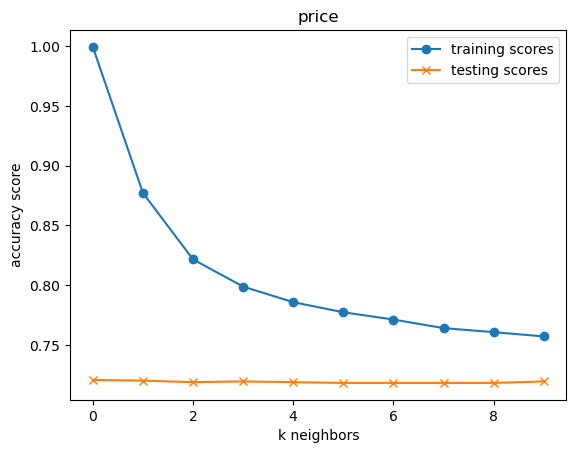

k: 1, Train/Test Score: 1.000/0.819
k: 2, Train/Test Score: 0.908/0.826
k: 3, Train/Test Score: 0.897/0.821
k: 4, Train/Test Score: 0.885/0.823
k: 5, Train/Test Score: 0.872/0.827
k: 6, Train/Test Score: 0.866/0.831
k: 7, Train/Test Score: 0.866/0.828
k: 8, Train/Test Score: 0.860/0.828
k: 9, Train/Test Score: 0.858/0.827
k: 10, Train/Test Score: 0.853/0.829


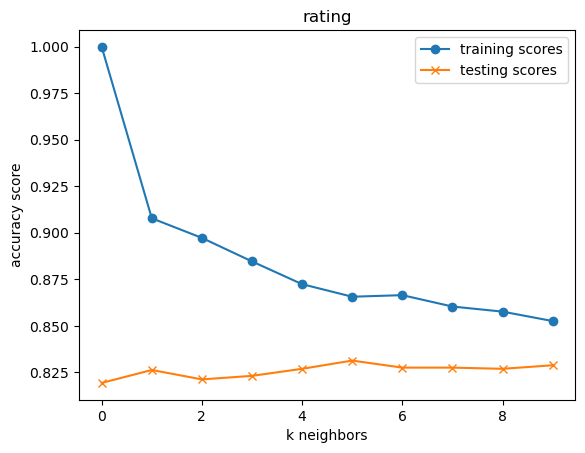

k: 1, Train/Test Score: 1.000/0.841
k: 2, Train/Test Score: 0.925/0.826
k: 3, Train/Test Score: 0.908/0.824
k: 4, Train/Test Score: 0.894/0.821
k: 5, Train/Test Score: 0.883/0.823
k: 6, Train/Test Score: 0.877/0.822
k: 7, Train/Test Score: 0.873/0.824
k: 8, Train/Test Score: 0.872/0.824
k: 9, Train/Test Score: 0.867/0.823
k: 10, Train/Test Score: 0.862/0.826


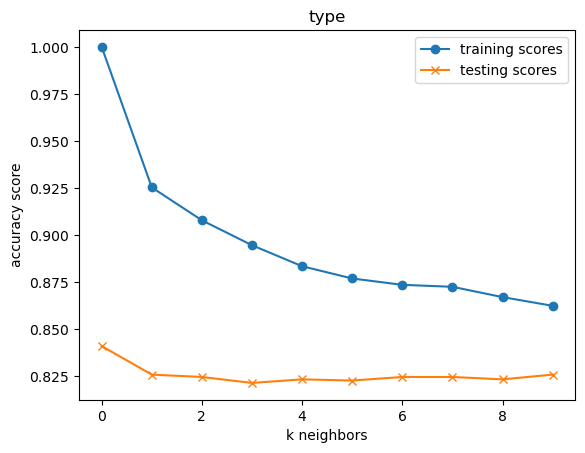

In [30]:
df=pd.read_csv('wines_SPA.csv')
df.drop(columns=['country', 'year'], inplace=True)
train_scores = []
test_scores = []
targets=['price', 'rating', 'type']
obj_columns=['winery', 'wine', 'region', 'type','price','rating']
for obj in obj_columns:
    encoder=LabelEncoder()
    label_encoded=encoder.fit_transform(df[obj])
    df[obj]=label_encoded
df_final= df.dropna()
display(df_final.corr())
for target in targets:
    y = df_final[target]
    X = df_final.drop(columns=target, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    train_scores=[]
    test_scores=[]
    for k in range(1, 11, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    plt.plot(train_scores, marker='o', label="training scores")
    plt.plot(test_scores, marker="x", label="testing scores")
    plt.xlabel("k neighbors")
    plt.ylabel("accuracy score")
    plt.legend()
    plt.title(f'{target}')
    plt.show()

In [31]:
# from ClassificationDataPipeline import train_and_evaluate_models
# df = pd.read_csv('wine_df2.csv')
# df.head()

In [32]:
# df.drop(columns=['description','region_2','taster_name','taster_twitter_handle','Unnamed: 0'], inplace=True)

In [33]:
# target_column = 'points'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [34]:
# target_column = 'title'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [35]:
# target_column = 'price'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [36]:
#MinMaxScaler 
df = cleaned_df
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8848, R² Score: 0.8848, MSE: 2526.3272
KNN - Testing Score: 0.6261, R² Score: 0.6261, MSE: 14893.4556
--------------------------------------------------
Random Forest - Training Score: 0.9630, R² Score: 0.9630, MSE: 812.6272
Random Forest - Testing Score: 0.6334, R² Score: 0.6334, MSE: 14600.8625
--------------------------------------------------
Gradient Boosting - Training Score: 0.9079, R² Score: 0.9079, MSE: 2019.8950
Gradient Boosting - Testing Score: 0.6302, R² Score: 0.6302, MSE: 14730.1694
--------------------------------------------------
AdaBoost - Training Score: -11.9251, R² Score: -11.9251, MSE: 283517.1935
AdaBoost - Testing Score: -6.3449, R² Score: -6.3449, MSE: 292549.9653
--------------------------------------------------
SVM - Training Score: 0.1037, R² Score: 0.1037, MSE: 19661.1311
SVM - Testing Score: 0.0686, R² Score: 0.0686, MSE: 37099.2187
--------------------------------------------------
Linear Regression - Training Score: 0.8699, R² S

In [37]:
wine_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,N.V.,4.2,32624,Espana,Vino de Espana,4.99,Red,4.0,3.0
1764,Mocen,Seleccion Especial Verdejo,2021,4.3,32,Espana,Rueda,6.26,Verdejo,3.0,3.0
1947,Marques de Caceres,Rioja Satinela Blanco Semidulce,2020,4.2,630,Espana,Rioja,6.99,Rioja White,3.0,3.0
2612,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
2912,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0


In [40]:
wine_df.columns

Index(['winery', 'wine', 'year', 'rating', 'region', 'price', 'type', 'body',
       'acidity'],
      dtype='object')

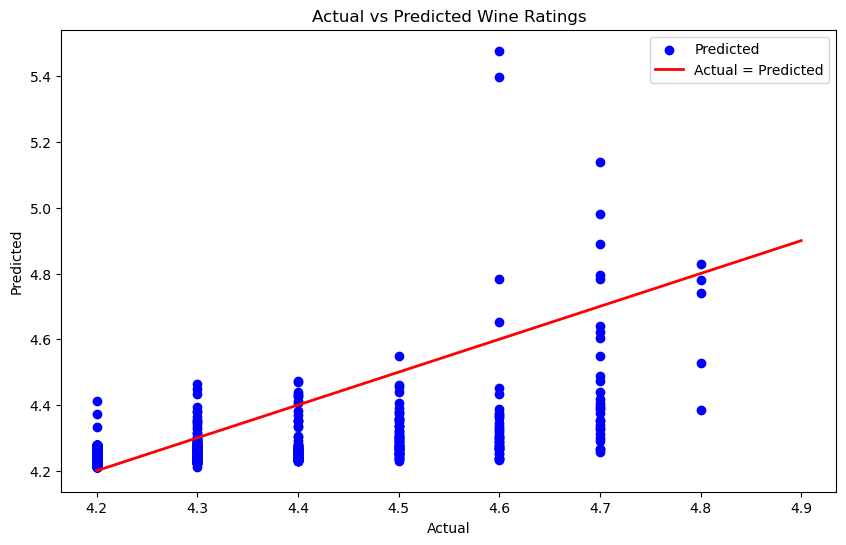

In [43]:
# Cleaning the data
wine_df_copy = wine_df.copy()  # Making a copy of the dataframe
wine_df_copy = wine_df_copy[wine_df_copy['rating'].apply(lambda x: isinstance(x, (int, float)))]

# Converting columns to the correct data types
wine_df_copy['rating'] = wine_df_copy['rating'].astype(float)
wine_df_copy['price'] = wine_df_copy['price'].astype(float)
wine_df_copy['acidity'] = wine_df_copy['acidity'].astype(float)

# Converting categorical data to numeric using one-hot encoding
wine_df_copy = pd.get_dummies(wine_df_copy, columns=['type', 'body'])

# Selecting relevant features and target variable
features = ["price", "acidity"] + [col for col in wine_df_copy.columns if col.startswith('type_') or col.startswith('body_')]
target = "rating"

X = wine_df_copy[features]
y = wine_df_copy[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Actual = Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Wine Ratings')
plt.legend()
plt.show()
